In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

from colorspacious import cspace_converter
import matplotlib as mpl

In [2]:
data = pd.read_excel("D:/Данные/Данные Хайдельберг/daten.xlsx")


In [3]:
df = pd.DataFrame(data)


In [4]:

df['Anteil der arbeitslosen Deutschen an allen Deutschen'] = round((df['\nArbeitslose Deutsche'] / df['Deutsche insgesamt']) * 100, 1)
df

,Stadtteil,Wohnungen,Wohnfläche insgesamt,Mietindex.Kalt,Anteil der Wohnungen älter als 1948,Anteil der Wohnungen zwischen 1949 und 1968,Anteil der Wohnungen zwischen 1969 und 1978,Anteil der Wohnungen zwischen 1979 und 1989,Anteil der Wohnungen zwischen 1990 und 1999,Anteil der Wohnungen zwischen 2000 und 2009,...,Anteil Deutsche,Ausländer insgesamt,Ausländeranteil,EU-Ausländer insgesamt,EU-Ausländeranteil unter allen Ausländern,Anteil Einwohner 30 bis 44 Jahre,Anteil Einwohner 45 bis 64 Jahre,Anteil Einwohner 65 Jahre und älter,\nArbeitslose Deutsche,Anteil der arbeitslosen Deutschen an allen Deutschen
0,Altstadt,5263,376013,16.5,72.0,2.2,6.0,13.9,3.1,1.5,...,78.1,2165,21.9,840,38.8,20.8,18.7,14.5,38,0.5
1,Bahnstadt,3190,218227,14.7,0.1,0.2,0.0,0.1,0.1,0.0,...,72.7,1582,27.3,521,32.9,34.9,13.2,3.1,145,3.4
2,Bergheim,4879,280696,14.8,34.3,13.3,9.4,14.0,5.3,12.1,...,71.0,2132,29.0,549,25.8,25.4,18.8,13.1,119,2.3
3,Boxberg,2133,160077,15.3,0.0,73.0,20.7,2.1,3.7,0.2,...,71.0,1194,29.0,416,34.8,20.3,26.2,22.7,191,6.5
4,Emmertsgrund,2658,222171,15.3,0.0,0.0,59.0,23.7,17.2,0.0,...,69.7,2044,30.3,660,32.3,18.7,23.4,22.0,71,1.5
5,Handschuhsheim,9951,735626,17.2,31.9,28.0,9.7,16.3,6.5,2.3,...,83.2,2999,16.8,992,33.1,18.1,21.2,17.8,267,1.8
6,Kirchheim,8912,679869,12.5,18.4,29.0,5.4,16.9,16.4,4.2,...,77.1,4057,22.9,866,21.3,21.5,23.4,17.4,323,2.4
7,Neuenheim,7106,617731,16.4,46.0,18.4,6.0,5.4,8.0,10.3,...,82.2,2271,17.8,889,39.1,20.6,21.2,17.3,173,1.7
8,Pfaffengrund,4202,301908,13.8,16.9,62.3,2.8,3.9,4.3,2.8,...,84.1,1267,15.9,399,31.5,19.5,25.9,23.6,158,2.4
9,Rohrbach,8732,670887,15.8,17.5,20.4,25.8,12.0,7.6,9.8,...,78.7,3511,21.3,1025,29.2,20.6,23.0,17.4,193,1.5


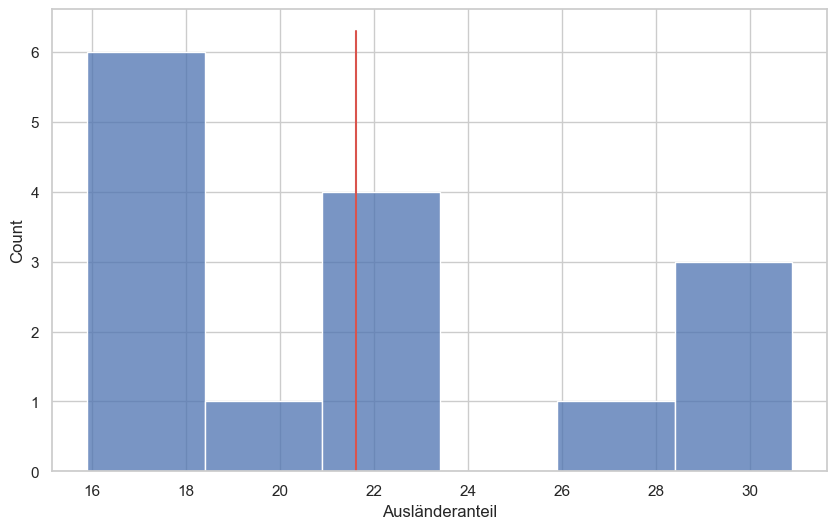

In [9]:

import warnings

# Suppress specific warning
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')

# Your data processing steps
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.histplot(x=df["Ausländeranteil"], binwidth=2.5)
mean = df["Ausländeranteil"].mean()
y = ax.get_ylim()
ax.plot([mean, mean], y, sns.xkcd_rgb["pale red"])
fig.savefig('histogramm_int_rate.png', bbox_inches='tight')

plt.show()


In [10]:
# Der Wert des Ausländeranteils variiert zwischen 15,9 und 30,3. Die Verteilung ist nicht normal.  
# Analyse der Prädiktoren auf Korrelation mit der abhängigen Variable Ausländeranteil.  
# Es ist notwendig, statistisch signifikante Variablen in unsere Daten zu bestimmen. 

In [11]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
# Aufgrund der geringen Stichprobengröße sollten Sie die Warnung ignorieren

x_columns = df.columns[2:]

for x_col in x_columns:
    df.dropna(subset=[x_col], inplace=True)
    X = df[x_col]
    Y = df['Ausländeranteil']
    X = sm.add_constant(X)
    model_lin = sm.OLS(Y, X)
    results_lin = model_lin.fit()
    print(f"Spaltenergebnisse {x_col}:")
    print(results_lin.summary())
    print("____________________")


Spaltenergebnisse Wohnfläche insgesamt:
                            OLS Regression Results                            
Dep. Variable:        Ausländeranteil   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     3.756
Date:                Thu, 11 Jul 2024   Prob (F-statistic):             0.0746
Time:                        20:47:33   Log-Likelihood:                -43.004
No. Observations:                  15   AIC:                             90.01
Df Residuals:                      13   BIC:                             91.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [12]:
# Auf der Grundlage der vorgelegten Daten ist keine der Variablen auf einem Signifikanzniveau von 0,05 statistisch signifikant. Die Variablen:  
# Wohnfläche insgesamt  
# Anteil der Wohnungen älter als 1948  
# Anteil der Wohnungen zwischen 1969 und 1978  
# Anteil Wohnungen mit 1 Raum  
# Anteil Wohnungen mit 6 oder mehr Räumen  
# Anteil arbeitslose Deutsche  
# haben jedoch einen p-Wert, der nahe an der Signifikanz auf dem Niveau von 0,1 liegt, 
#was auf eine potenzielle Signifikanz bei weniger strengen Signifikanzniveaus hinweisen könnte.  


In [13]:
X = df['Wohnfläche insgesamt']
Y = df['Ausländeranteil']
X = sm.add_constant(X)

In [14]:
warnings.filterwarnings("ignore", category=UserWarning)

model_lin = sm.OLS(Y,X)
results_lin = model_lin.fit()
print(results_lin.summary())
predictions_lin = results_lin.predict()

                            OLS Regression Results                            
Dep. Variable:        Ausländeranteil   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     3.756
Date:                Thu, 11 Jul 2024   Prob (F-statistic):             0.0746
Time:                        20:47:35   Log-Likelihood:                -43.004
No. Observations:                  15   AIC:                             90.01
Df Residuals:                      13   BIC:                             91.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   26.4821 

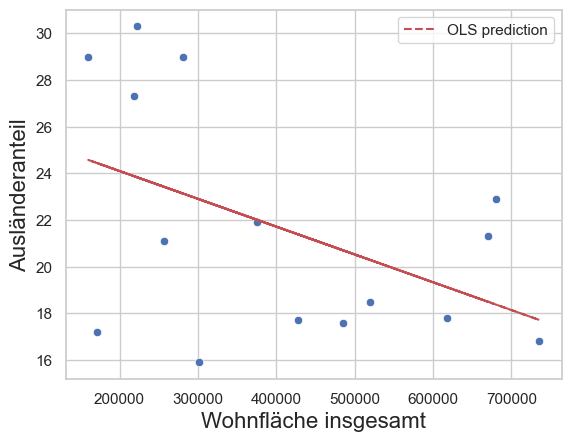

In [15]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='Wohnfläche insgesamt', y='Ausländeranteil')
ax.plot(X['Wohnfläche insgesamt'], predictions_lin, 'r--', label="OLS prediction")
ax.set_xlabel('Wohnfläche insgesamt',size=16)
ax.set_ylabel('Ausländeranteil',size=16)
ax.legend(loc="best")
fig.savefig('mpg_linear.png')

In [16]:
X = df['Anteil der Wohnungen älter als 1948']
Y = df['Ausländeranteil']
X = sm.add_constant(X)



In [17]:
warnings.filterwarnings("ignore", category=UserWarning)

model_lin = sm.OLS(Y,X)
results_lin = model_lin.fit()
print(results_lin.summary())
predictions_lin = results_lin.predict()


                            OLS Regression Results                            
Dep. Variable:        Ausländeranteil   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     3.093
Date:                Thu, 11 Jul 2024   Prob (F-statistic):              0.102
Time:                        20:47:37   Log-Likelihood:                -43.307
No. Observations:                  15   AIC:                             90.61
Df Residuals:                      13   BIC:                             92.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

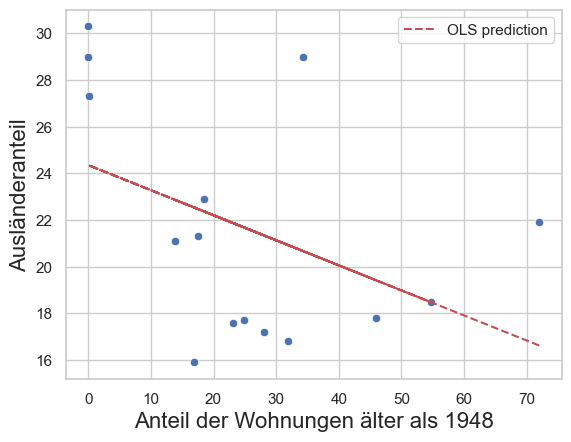

In [18]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='Anteil der Wohnungen älter als 1948', y='Ausländeranteil')
ax.plot(X['Anteil der Wohnungen älter als 1948'], predictions_lin, 'r--', label="OLS prediction")
ax.set_xlabel('Anteil der Wohnungen älter als 1948',size=16)
ax.set_ylabel('Ausländeranteil',size=16)
ax.legend(loc="best")
fig.savefig('mpg_linear.png')


In [19]:
X = df['Anteil der Wohnungen zwischen 1969 und 1978']
Y = df['Ausländeranteil']
X = sm.add_constant(X)

In [20]:
warnings.filterwarnings("ignore", category=UserWarning)

model_lin = sm.OLS(Y,X)
results_lin = model_lin.fit()
print(results_lin.summary())
predictions_lin = results_lin.predict()

                            OLS Regression Results                            
Dep. Variable:        Ausländeranteil   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     4.240
Date:                Thu, 11 Jul 2024   Prob (F-statistic):             0.0601
Time:                        20:47:39   Log-Likelihood:                -42.790
No. Observations:                  15   AIC:                             89.58
Df Residuals:                      13   BIC:                             91.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

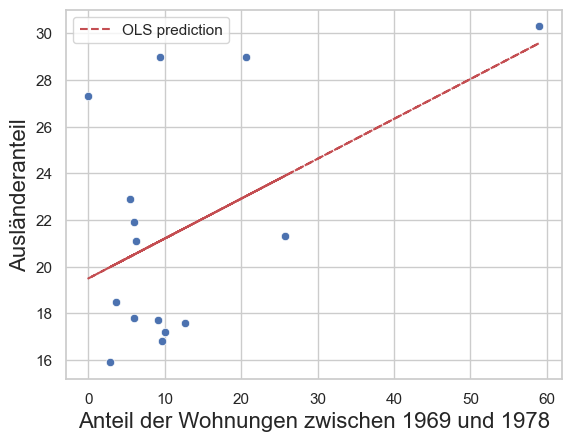

In [21]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='Anteil der Wohnungen zwischen 1969 und 1978', y='Ausländeranteil')
ax.plot(X['Anteil der Wohnungen zwischen 1969 und 1978'], predictions_lin, 'r--', label="OLS prediction")
ax.set_xlabel('Anteil der Wohnungen zwischen 1969 und 1978',size=16)
ax.set_ylabel('Ausländeranteil',size=16)
ax.legend(loc="best")
fig.savefig('mpg_linear.png')

In [22]:
X = df['Anteil Wohnungen mit 1 Raum']
Y = df['Ausländeranteil']
X = sm.add_constant(X)

In [23]:
warnings.filterwarnings("ignore", category=UserWarning)

model_lin = sm.OLS(Y,X)
results_lin = model_lin.fit()
print(results_lin.summary())
predictions_lin = results_lin.predict()

                            OLS Regression Results                            
Dep. Variable:        Ausländeranteil   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     4.288
Date:                Thu, 11 Jul 2024   Prob (F-statistic):             0.0588
Time:                        20:47:40   Log-Likelihood:                -42.769
No. Observations:                  15   AIC:                             89.54
Df Residuals:                      13   BIC:                             90.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

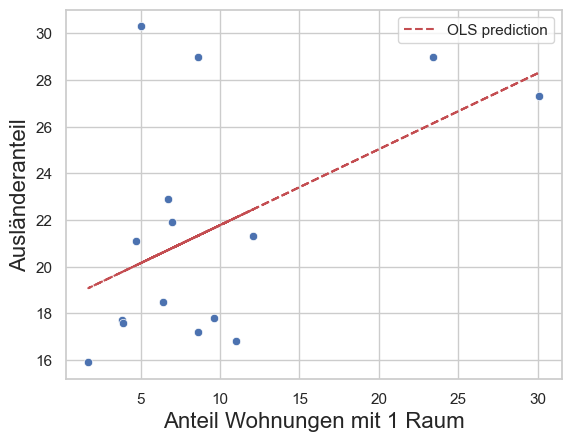

In [24]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='Anteil Wohnungen mit 1 Raum', y='Ausländeranteil')
ax.plot(X['Anteil Wohnungen mit 1 Raum'], predictions_lin, 'r--', label="OLS prediction")
ax.set_xlabel('Anteil Wohnungen mit 1 Raum',size=16)
ax.set_ylabel('Ausländeranteil',size=16)
ax.legend(loc="best")
fig.savefig('mpg_linear.png')

In [25]:
X = df['Anteil Wohnungen mit 6 oder mehr Räumen']
Y = df['Ausländeranteil']
X = sm.add_constant(X)

In [26]:
warnings.filterwarnings("ignore", category=UserWarning)

model_lin = sm.OLS(Y,X)
results_lin = model_lin.fit()
print(results_lin.summary())
predictions_lin = results_lin.predict()

                            OLS Regression Results                            
Dep. Variable:        Ausländeranteil   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     5.792
Date:                Thu, 11 Jul 2024   Prob (F-statistic):             0.0317
Time:                        20:47:41   Log-Likelihood:                -42.144
No. Observations:                  15   AIC:                             88.29
Df Residuals:                      13   BIC:                             89.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

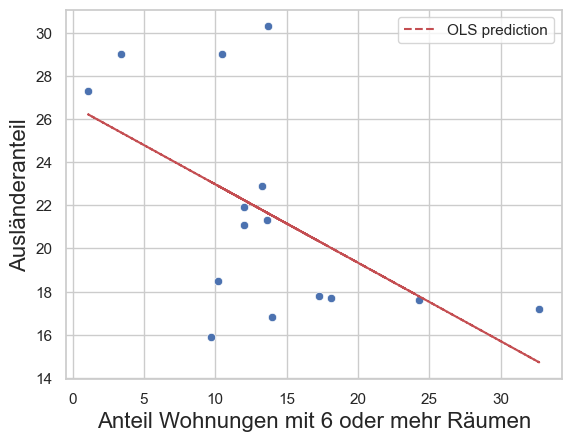

In [27]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='Anteil Wohnungen mit 6 oder mehr Räumen', y='Ausländeranteil')
ax.plot(X['Anteil Wohnungen mit 6 oder mehr Räumen'], predictions_lin, 'r--', label="OLS prediction")
ax.set_xlabel('Anteil Wohnungen mit 6 oder mehr Räumen',size=16)
ax.set_ylabel('Ausländeranteil',size=16)
ax.legend(loc="best")
fig.savefig('mpg_linear.png')

In [28]:
X = df['Anteil der arbeitslosen Deutschen an allen Deutschen']
Y = df['Ausländeranteil']
X = sm.add_constant(X)

In [29]:
warnings.filterwarnings("ignore", category=UserWarning)

model_lin = sm.OLS(Y,X)
results_lin = model_lin.fit()
print(results_lin.summary())
predictions_lin = results_lin.predict()

                            OLS Regression Results                            
Dep. Variable:        Ausländeranteil   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     3.279
Date:                Thu, 11 Jul 2024   Prob (F-statistic):             0.0934
Time:                        20:47:42   Log-Likelihood:                -43.221
No. Observations:                  15   AIC:                             90.44
Df Residuals:                      13   BIC:                             91.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

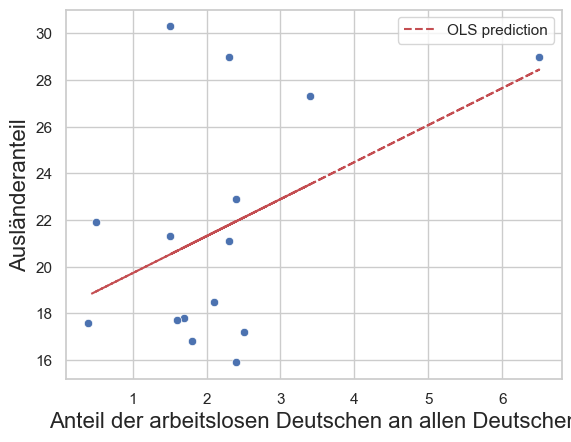

In [30]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='Anteil der arbeitslosen Deutschen an allen Deutschen', y='Ausländeranteil')
ax.plot(X['Anteil der arbeitslosen Deutschen an allen Deutschen'], predictions_lin, 'r--', label="OLS prediction")
ax.set_xlabel('Anteil der arbeitslosen Deutschen an allen Deutschen',size=16)
ax.set_ylabel('Ausländeranteil',size=16)
ax.legend(loc="best")
fig.savefig('mpg_linear.png')

In [31]:
# Nachfolgend interpretieren wir die Regressionsresultate für jede der ausgewählten Spalten.

# 1. Wohnfläche insgesamt  
# Negative Korrelation mit dem Ausländeranteil. Die Korrelation ist nicht sehr stark. 
# Es gibt eine erhebliche Anzahl von Ausreißern und Datenstreuung. 
# Laut dem Modell ist eine Vergrößerung der Wohnfläche mit einer Verringerung des Ausländeranteils verbunden.

# 2. Anteil der Wohnungen älter als 1948  
# Negative Korrelation mit dem Ausländeranteil. Schwache Korrelation.  
# Mögliche Ursache: Alte Häuser können höhere Wartungs- und Reparaturkosten erfordern,
# was ihre Attraktivität für Ausländer verringern kann.

# 3. Anteil der Wohnungen zwischen 1969 und 1978  
# Positive Korrelation. Möglicher Einfluss: Wohnungen, die zwischen 1969 und 1978 gebaut wurden, 
# können bestimmte historische und wirtschaftliche Bedingungen widerspiegeln. 
# Zum Beispiel könnten sie wartungsärmer und preislich zugänglicher sein.

# 4. Anteil Wohnungen mit 1 Raum  
#    Positive Korrelation. Möglicher Einfluss: Einzimmerwohnungen könnten bei jungen Leuten, 
# Studenten oder alleinstehenden Migranten beliebt sein, da sie in der Regel günstiger sind.

# 5. Anteil Wohnungen mit 6 oder mehr Räumen  
#    Negative Korrelation mit dem Ausländeranteil. Möglicher Einfluss: 
# Wohnungen mit vielen Zimmern können einen bestimmten sozialen Status oder eine bestimmte Bevölkerungsschicht widerspiegeln. 
# Der hohe Preis solcher Wohnungen kann sie für die meisten Ausländer weniger zugänglich machen.

# 6. Anteil arbeitslose Deutsche  
#    Positive Korrelation. Möglicher Einfluss: Die Arbeitslosenquote unter der einheimischen 
# Bevölkerung kann ein wichtiger wirtschaftlicher Indikator sein. 
# Zum Beispiel kann in Gebieten mit hoher Ausländerkonzentration ein niedrigeres 
# soziales Niveau unter der einheimischen Bevölkerung vorherrschen.

In [32]:
#проверка взаимосвязи 

X = df[['Wohnfläche insgesamt' ,'Anteil der Wohnungen älter als 1948','Anteil der Wohnungen zwischen 1969 und 1978','Anteil Wohnungen mit 1 Raum', 'Anteil Wohnungen mit 6 oder mehr Räumen', 'Anteil der arbeitslosen Deutschen an allen Deutschen']]
Y = df['Ausländeranteil']

In [33]:
X = sm.add_constant(X)

In [34]:
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Ausländeranteil   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     6.884
Date:                Thu, 11 Jul 2024   Prob (F-statistic):            0.00788
Time:                        20:47:45   Log-Likelihood:                -31.268
No. Observations:                  15   AIC:                             76.54
Df Residuals:                       8   BIC:                             81.49
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [35]:
# Überprüfung der Prädiktor-Korrelation.  
# F-statistic: 6.884 und Prob (F-statistic): 0.00788 - Ein hoher F-Statistik-Wert und ein niedriger p-Wert zeigen, 
# dass das Modell insgesamt signifikant ist.  
# Die signifikantesten Koeffizienten:  
# - Anteil der Wohnungen zwischen 1969 und 1978: 0.2142, p-Wert 0.007 - Positive und 
# statistisch signifikante Auswirkung auf den Ausländeranteil.
# - Anteil Wohnungen mit 1 Raum: 0.2261, p-Wert 0.085 - Positive Auswirkung, 
# jedoch an der Grenze der statistischen Signifikanz.
# - Anteil Wohnungen mit 6 oder mehr Räumen: -0.2357, p-Wert 0.073 - Negative Auswirkung, 
# nahe der statistischen Signifikanz.

In [36]:
list = [ 'Ausländeranteil', 'Wohnfläche insgesamt' ,'Anteil der Wohnungen älter als 1948','Anteil der Wohnungen zwischen 1969 und 1978','Anteil Wohnungen mit 1 Raum', 'Anteil Wohnungen mit 6 oder mehr Räumen', 'Anteil der arbeitslosen Deutschen an allen Deutschen']

In [37]:
df1 = df[list]

In [38]:
df1

,Ausländeranteil,Wohnfläche insgesamt,Anteil der Wohnungen älter als 1948,Anteil der Wohnungen zwischen 1969 und 1978,Anteil Wohnungen mit 1 Raum,Anteil Wohnungen mit 6 oder mehr Räumen,Anteil der arbeitslosen Deutschen an allen Deutschen
0,21.9,376013,72.0,6.0,7.0,12.0,0.5
1,27.3,218227,0.1,0.0,30.1,1.1,3.4
2,29.0,280696,34.3,9.4,23.4,3.4,2.3
3,29.0,160077,0.0,20.7,8.6,10.5,6.5
4,30.3,222171,0.0,59.0,5.0,13.7,1.5
5,16.8,735626,31.9,9.7,11.0,14.0,1.8
6,22.9,679869,18.4,5.4,6.7,13.3,2.4
7,17.8,617731,46.0,6.0,9.6,17.3,1.7
8,15.9,301908,16.9,2.8,1.7,9.7,2.4
9,21.3,670887,17.5,25.8,12.1,13.6,1.5


In [39]:
correlation_matrix = df1.corr()
correlation_matrix

,Ausländeranteil,Wohnfläche insgesamt,Anteil der Wohnungen älter als 1948,Anteil der Wohnungen zwischen 1969 und 1978,Anteil Wohnungen mit 1 Raum,Anteil Wohnungen mit 6 oder mehr Räumen,Anteil der arbeitslosen Deutschen an allen Deutschen
Ausländeranteil,1.000000,-0.473471,-0.438407,0.495917,0.498036,-0.555179,0.448779
Wohnfläche insgesamt,-0.473471,1.000000,0.365557,-0.170345,-0.151463,0.092521,-0.446659
Anteil der Wohnungen älter als 1948,-0.438407,0.365557,1.000000,-0.415411,-0.147171,0.129625,-0.518131
Anteil der Wohnungen zwischen 1969 und 1978,0.495917,-0.170345,-0.415411,1.000000,-0.191336,0.110913,-0.030174
Anteil Wohnungen mit 1 Raum,0.498036,-0.151463,-0.147171,-0.191336,1.000000,-0.544687,0.251488
Anteil Wohnungen mit 6 oder mehr Räumen,-0.555179,0.092521,0.129625,0.110913,-0.544687,1.000000,-0.301718
Anteil der arbeitslosen Deutschen an allen Deutschen,0.448779,-0.446659,-0.518131,-0.030174,0.251488,-0.301718,1.000000


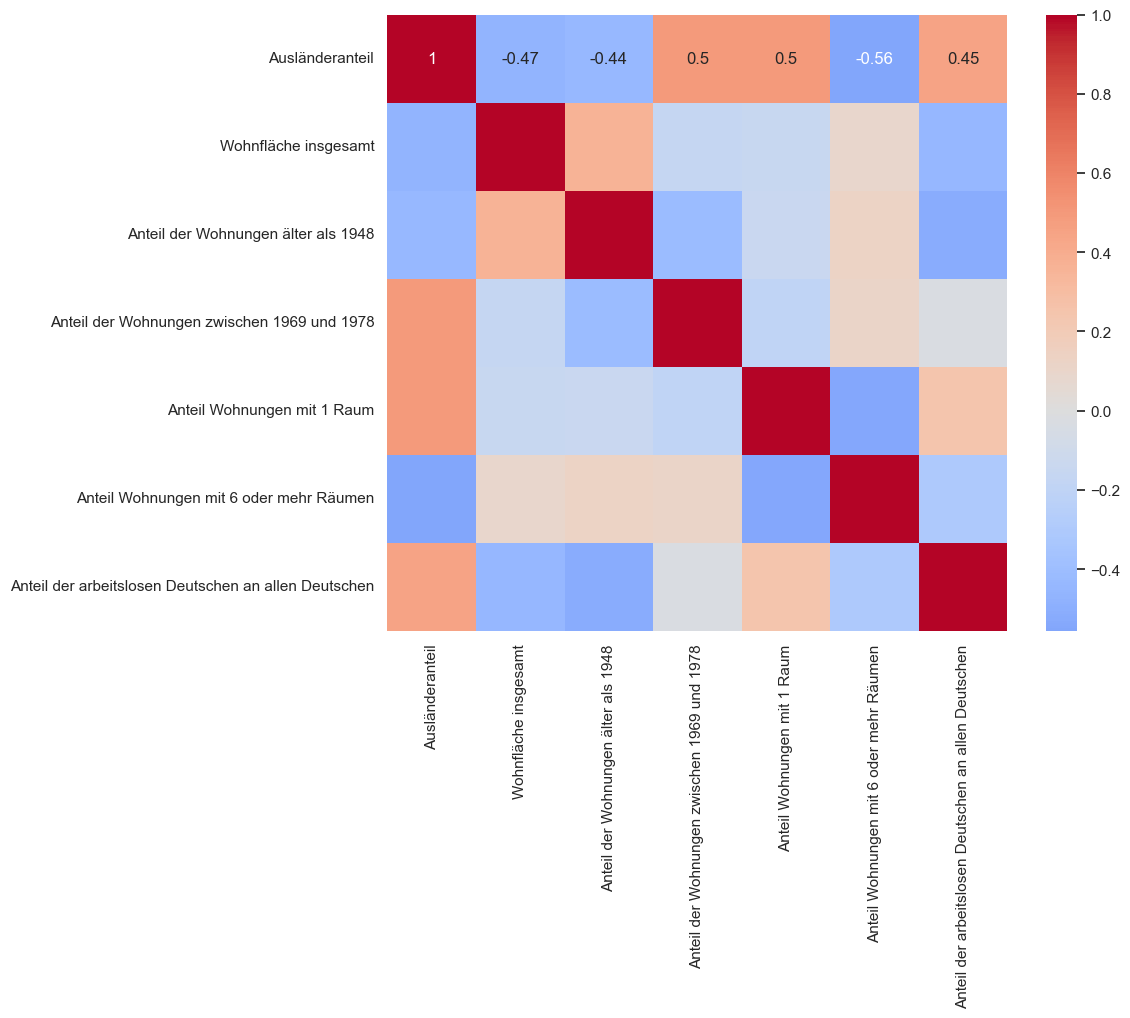

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

In [41]:
# Modell-Diagnostik:
# - Omnibus: 2.881, p-Wert 0.237 - Keine signifikanten Abweichungen von der Normalverteilung der Residuen.
# - Durbin-Watson: 2.248 - Ein Wert nahe 2, was auf das Fehlen von Autokorrelation der Residuen hinweist.
# - Jarque-Bera (JB): 1.064, p-Wert 0.587 - Zusätzliche Bestätigung des Fehlens signifikanter Abweichungen von der Normalverteilung.
# - Condition Number: 3.02e+06 - Ein hoher Wert deutet auf mögliche Multikollinearitätsprobleme hin.

# Eine Überprüfung der Datenkorrektheit zur Vermeidung möglicher Fehler wird durch die Analyse der Korrelationsmatrix und 
# die Untersuchung der Multikollinearität unterstützt. Basierend auf der bereitgestellten Korrelationsmatrix können wir einige Schlussfolgerungen 
# über die Beziehungen zwischen den Variablen ziehen.

# Für den Ausländeranteil:  
# - Wohnfläche insgesamt: -0.473471. Schwache negative Korrelation.  
# - Anteil der Wohnungen älter als 1948: -0.438407. Schwache negative Korrelation.  
# - Anteil der Wohnungen zwischen 1969 und 1978: 0.495917. Schwache positive Korrelation.  
# - Anteil Wohnungen mit 1 Raum: 0.498036. Schwache positive Korrelation.  
# - Anteil Wohnungen mit 6 oder mehr Räumen: -0.555179. Mäßige negative Korrelation.  
# - Anteil der arbeitslosen Deutschen an allen Deutschen: Korrelation 0.448779.  

# Für die Wohnfläche insgesamt:  
# - Anteil der Wohnungen älter als 1948: 0.365557. Schwache positive Korrelation. Vermutlich haben ältere Häuser eine größere Fläche, 
# was die Gesamtwohnfläche im Stadtteil beeinflusst.  
# - Anteil der arbeitslosen Deutschen an allen Deutschen: -0.446659. Schwache negative Korrelation.  

# Für den Anteil der Wohnungen älter als 1948:  
# - Anteil der Wohnungen zwischen 1969 und 1978: -0.415411. Schwache negative Korrelation. Logisch gesehen: 
# Je weniger alte Häuser, desto mehr „1969 und 1978“ Häuser.  
# - Anteil der arbeitslosen Deutschen an allen Deutschen: -0.518131. Mäßige negative Korrelation. 
# Die Mehrheit der arbeitslosen Deutschen wohnt nicht in Häusern älter als 1948.  

# Für den Anteil Wohnungen mit 1 Raum:  
# - Anteil Wohnungen mit 6 oder mehr Räumen: -0.544687. Mäßige negative Korrelation. Logisch gesehen: 
# Je mehr Einzimmerwohnungen, desto weniger große Wohnungen.  

# Für den Anteil Wohnungen mit 6 oder mehr Räumen:  
# - Anteil der arbeitslosen Deutschen an allen Deutschen: -0.301718. Schwache negative Korrelation.  

# Schlüsseleinsichten:  
# - Wohnfläche insgesamt: Eine Vergrößerung der Wohnfläche ist mit einem Rückgang des Ausländeranteils und 
# des Anteils der arbeitslosen Deutschen verbunden.
# - Anteil der Wohnungen älter als 1948: Steht im Zusammenhang mit dem Anteil der arbeitslosen Deutschen.
# - Anteil der Wohnungen zwischen 1969 und 1978: Steht im Zusammenhang mit dem Anteil der Anteil der Wohnungen älter als 1948.
# - Anteil Wohnungen mit 1 Raum: Steht im Zusammenhang mit dem Anteil der Wohnungen mit 6 oder mehr Räumen und dem Anteil der arbeitslosen Deutschen.  


In [42]:
yhat = results.predict()

In [43]:
rse = np.sqrt((1/(len(X)-2))*np.sum((Y-yhat)**2))
rse

2.08994177149889

In [44]:
rse/np.mean(Y)*100

9.666705696109574

In [45]:
# Das Modell hat einen relativ niedrigen (2.09) Residual Standard Error, was auf eine gute Anpassung hinweist.  
# Die durchschnittliche Abweichung beträgt etwa 9,67 % des Mittelwerts der abhängigen Variable. 
# Das bedeutet, dass die Vorhersagefehler des Modells etwa 9,67 % des durchschnittlichen Ausländeranteils betragen, 
# was auf eine relativ hohe Genauigkeit des Modells mit Fehlern unter 10 % des Mittelwerts hinweist. 

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Предположим, что X - это DataFrame с предикторами
X = df[['Anteil der Wohnungen älter als 1948','Anteil der Wohnungen zwischen 1969 und 1978','Anteil Wohnungen mit 1 Raum', 'Anteil Wohnungen mit 6 oder mehr Räumen', 'Anteil der arbeitslosen Deutschen an allen Deutschen']]


# Добавление константы
X = sm.add_constant(X)

# Вычисление VIF для каждого предиктора
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


                                             feature        VIF
0                                              const  31.425812
1                Anteil der Wohnungen älter als 1948   1.872883
2        Anteil der Wohnungen zwischen 1969 und 1978   1.418720
3                        Anteil Wohnungen mit 1 Raum   1.507215
4            Anteil Wohnungen mit 6 oder mehr Räumen   1.487022
5  Anteil der arbeitslosen Deutschen an allen Deu...   1.606714


In [47]:
# Um die Richtigkeit der statistischen Schlussfolgerungen zu gewährleisten, 
# ist es notwendig, das Maß der Multikollinearität zwischen den unabhängigen Variablen im Regressionsmodell zu bestimmen.  
# Alle Prädiktoren außer der Konstante haben einen VIF von weniger als 2, was auf eine niedrige Multikollinearität hinweist und 
# bedeutet, dass sie ohne signifikantes Risiko der Multikollinearität im Modell verwendet werden können. 
# Die Konstante hat einen hohen VIF, wird jedoch nicht wie andere Prädiktoren interpretiert.

In [48]:
# Schlussfolgerungen.  
# Wir haben die Faktoren untersucht, die den Anteil der ausländischen Einwohner in den verschiedenen Stadtteilen beeinflussen. 
# Die Hauptabhängige Variable war der Anteil der ausländischen Einwohner (Ausländeranteil), 
# und die unabhängigen Variablen waren verschiedene Merkmale des Wohnbestands und die Arbeitslosenquote unter den Deutschen.  
# Die Analyse zeigte die Signifikanz mehrerer Faktoren zur Erklärung des Ausländeranteils in den Stadtteilen. 
# Ich würde jedoch weitere Untersuchungen zu diesem Thema durchführen, um die Anzahl möglicher Einflussfaktoren zu erhöhen. 
# Das Ergebnis einer solchen Analyse könnte für die Gemeinde nützlich sein.